In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model, preprocessing, model_selection
from sklearn.model_selection import train_test_split, cross_val_score

![img](https://algotrading101.com/learn/wp-content/uploads/2020/06/training-validation-test-data-set.png)



In Machine Learning, the primary way we select the best model is through the use of test sets and cross-validation.

The idea of a test set works as follows:

- Take all of the available data and split it into two parts - a training set and a test set.
- Using only the training portion, you will estimate the parameters of several competing models.


# train_test_split

This function takes a list of arrays and splits each array into two arrays (a training set and a test set) by randomly selecting rows or values.

In [2]:
# x is our predictor matrix
# y is a numeric output - for regression methods
# z is a categorical output - for classification methods
X = np.arange(20).reshape((2, -1)).T
y = np.arange(10)
z = np.array([0,0,0,0,0,1,1,1,1,1])
print(X)
print(y)
print(z)

[[ 0 10]
 [ 1 11]
 [ 2 12]
 [ 3 13]
 [ 4 14]
 [ 5 15]
 [ 6 16]
 [ 7 17]
 [ 8 18]
 [ 9 19]]
[0 1 2 3 4 5 6 7 8 9]
[0 0 0 0 0 1 1 1 1 1]


We can use train_test_split on each array individually.

It returns a tuple that can be unpacked into train and test arrays.

In [3]:
X_train, X_test = train_test_split(X, test_size = 1/4, random_state = 1)
print(X_train)
print(X_test)

[[ 4 14]
 [ 0 10]
 [ 3 13]
 [ 1 11]
 [ 7 17]
 [ 8 18]
 [ 5 15]]
[[ 2 12]
 [ 9 19]
 [ 6 16]]


In [4]:
y_train, y_test = train_test_split(y, test_size = 1/4, random_state = 1)
print(y_train)
print(y_test)

[4 0 3 1 7 8 5]
[2 9 6]


We can also apply it to multiple arrays simultaneously.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 1)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[ 4 14]
 [ 0 10]
 [ 3 13]
 [ 1 11]
 [ 7 17]
 [ 8 18]
 [ 5 15]]
[[ 2 12]
 [ 9 19]
 [ 6 16]]
[4 0 3 1 7 8 5]
[2 9 6]


In [8]:
## if you have a categorical variable, the stratify argument ensures 
# that you'll get an appropriate number of each category in the resulting split
X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.4, random_state = 10, 
                                                    stratify = z)
print(X_train)
print(X_test)
print(z_train)
print(z_test)

[[ 0 10]
 [ 8 18]
 [ 7 17]
 [ 3 13]
 [ 2 12]
 [ 9 19]]
[[ 6 16]
 [ 5 15]
 [ 1 11]
 [ 4 14]]
[0 1 1 0 0 1]
[1 1 0 0]


In [ ]:
# view quiz answers
# 1) A
# 2) E
# 3) C

# Iron Slag example

magnetic test is cheaper. chemical test is more accurate.

Can we use the magnetic test to predict the chemical test result?

X = magnetic test result
y = chemical test


In [9]:
iron = pd.read_csv('ironslag.csv')
iron.head()

,chemical,magnetic
0,24,25
1,16,22
2,24,17
3,18,21
4,18,20


In [10]:
iron.shape

(53, 2)

## Plot of the full dataset

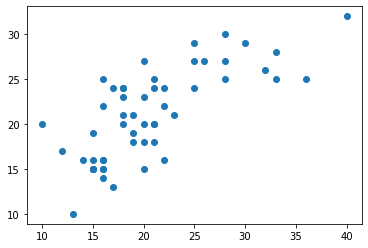

In [11]:
plt.scatter(iron.magnetic, iron.chemical)

## Create a hold-out set using train-test split

In [12]:
train, test = train_test_split(iron, test_size = 1/5, random_state = 1)

In [13]:
train

,chemical,magnetic
3,18,21
21,13,17
49,25,36
38,23,18
41,15,16
24,21,18
42,16,16
40,25,16
35,23,20
26,15,20


In [14]:
test

,chemical,magnetic
30,27,25
2,24,17
51,28,33
32,20,18
31,22,22
46,29,30
34,24,18
39,19,19
45,30,28
19,15,15


## Plot of the training data

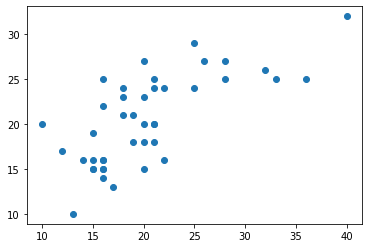

In [15]:
plt.scatter(train.magnetic, train.chemical)

## We will use only the training data to try out possible models

In [16]:
# sklearn requires our predictor variables to be in a two dimensional array
# reshape to have 1 column
# the -1 in reshape means I don't want to figure out all the necessary dimensions
# i want 1 column, and numpy, you figure out how many rows I need
X = train.magnetic.values.reshape(-1,1)
X.shape

(42, 1)

In [17]:
y = train.chemical.values
y.shape

(42,)

In [18]:
np.corrcoef(train.magnetic.values, train.chemical.values)

array([[1.        , 0.70876994],
       [0.70876994, 1.        ]])

In [19]:
# r-squared
np.corrcoef(train.magnetic.values, train.chemical.values)[0,1] ** 2

0.5023548215592254

# Fit a linear model between x and y

In [20]:
linear = linear_model.LinearRegression()

In [21]:
linear.fit(X, y)

LinearRegression()

In [22]:
# linear.score is the R^2 value
# how much error is reduced from no model (variance or MSE)
# vs having the regression model
linear.score(X, y)

0.5023548215592256

In [23]:
x_predict = np.arange(10, 40).reshape(-1,1)

In [24]:
lin_y_hat = linear.predict(x_predict)

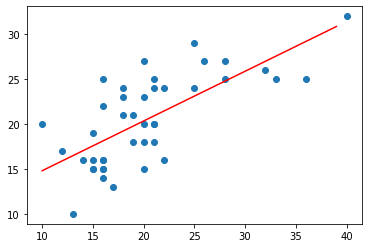

In [25]:
plt.scatter(X, y)
plt.plot(x_predict, lin_y_hat, c = 'red')

### Cross Validation

In [26]:
# shuffle split says 'shuffle the data' and split it into 5 equal parts
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.3, random_state=0)
cv_linear = model_selection.cross_val_score(linear, X, y, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

[0.5811901  0.5322723  0.45145614 0.13698027 0.65315849]
0.4710114602819653


Technically, the above is all you need to do. But I went ahead and wrote this loop which fits the model on the training data, and makes predictions for the validation data. 

In each plot, the light blue dots are the training data.

The green dots are the validation data.

The flat green line is the mean of the validation data. That would be the prediction if no model was fit.

The red line is the linear model that was trained on the training data. We hope that the red line does a better job of predicting the green points than the green line. In some cases, it does not, and we actually get a negative cross-validation score.

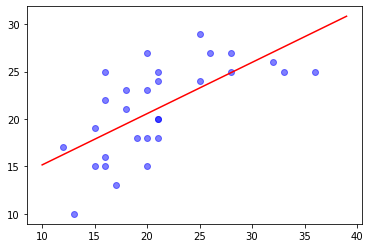

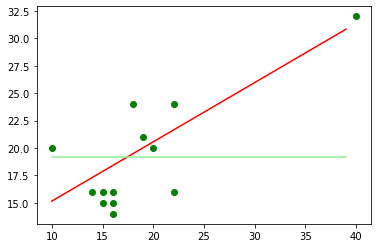

MS Error: 24.437869822485197
MS Regre: 10.23482179362804
score: 0.5811901009387072


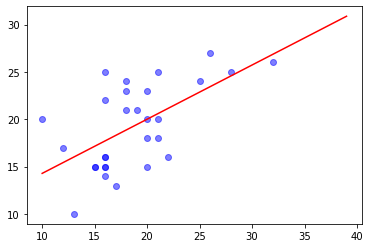

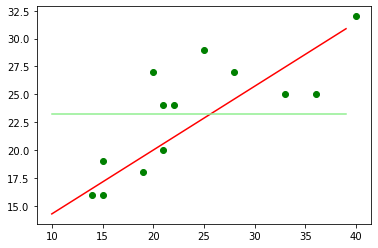

MS Error: 23.56213017751479
MS Regre: 11.020660964787265
score: 0.5322722995858744


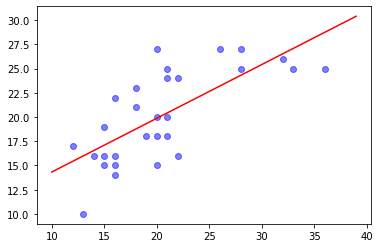

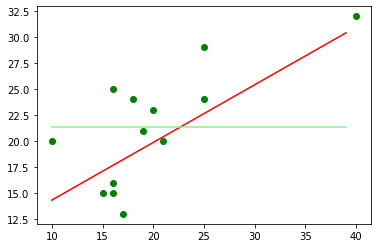

MS Error: 29.597633136094675
MS Regre: 16.235600054757683
score: 0.4514561356949124


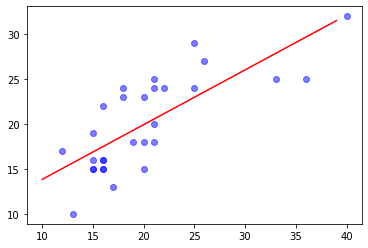

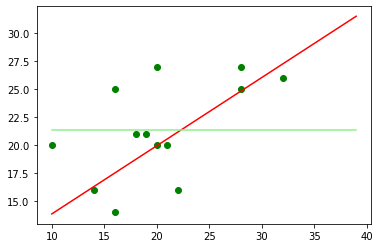

MS Error: 17.62130177514793
MS Regre: 15.207531047243664
score: 0.13698027300732737


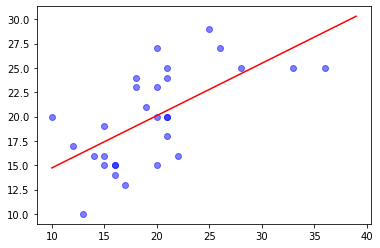

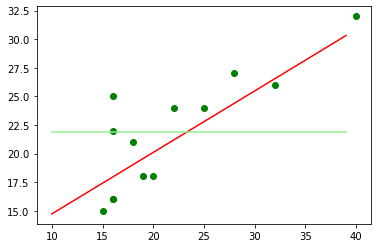

MS Error: 23.97633136094674
MS Regre: 8.315986921150667
score: 0.6531584921830051


In [27]:
for train_index, test_index in cv.split(X):
    # create a subset of the data using the training cases in cross validation
    tX = X[train_index, : ]
    ty = y[train_index]
    
    # initialize and fit a new linear regression model
    clin = linear_model.LinearRegression()
    
    # fit only on the training cases
    clin.fit(tX, ty)
    
    # create a subset for the test cases
    testX = X[test_index, :]
    testy = y[test_index]
    
    # plot the training data in blue and the fitted line in red
    plt.scatter(tX, ty, c = 'blue', alpha = 0.5)
    plt.plot(x_predict, clin.predict(x_predict), c = 'red')
    plt.show()
    
    # plot the test cases in green against the fitted line
    plt.scatter(testX, testy, c = 'green')
    plt.plot(x_predict, clin.predict(x_predict), c = 'red')
    plt.plot(x_predict, np.repeat(np.mean(testy), len(x_predict)), c = 'lightgreen')
    
    plt.show()
    
    # the MS of having no model = variance of the test data
    mse = np.var(testy)
    print("MS Error: " + str(mse))
    
    # the MS regression
    msr = sum((testy - clin.predict(testX))**2)/len(testy)
    print("MS Regre: " + str(msr))
    
    # the score is the proportion of reduction by having regression
    red = (mse - msr)/mse
    print("score: " + str(red))

# Polynomial fit - quadratic

In [28]:
# preprocessing polynomial features creates a polynomial based on X
poly2 = preprocessing.PolynomialFeatures(2)

In [29]:
polyX = poly2.fit_transform(X)

In [30]:
poly2reg = linear_model.LinearRegression(fit_intercept = False)

In [31]:
poly2reg.fit(polyX, y)

LinearRegression(fit_intercept=False)

In [32]:
poly2reg.score(polyX, y)

0.5093517031120863

In [33]:
poly2_X_new = poly2.fit_transform(x_predict)
poly2_y_hat = poly2reg.predict(poly2_X_new)

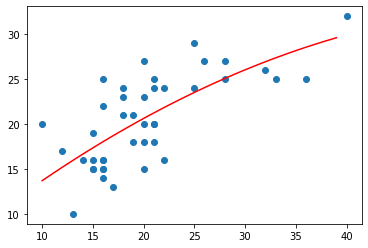

In [34]:
plt.scatter(X, y)
plt.plot(x_predict, poly2_y_hat, c = 'red')

In [35]:
cv_quad = model_selection.cross_val_score(poly2reg, polyX, y, cv=cv)
print(cv_quad)
print(np.mean(cv_quad))

[ 0.20489832  0.39310396  0.24068822 -0.11114126  0.58637808]
0.2627854641005616


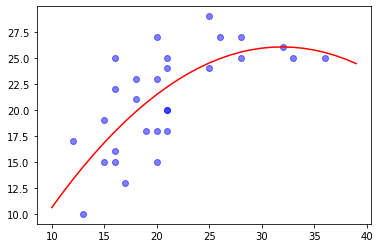

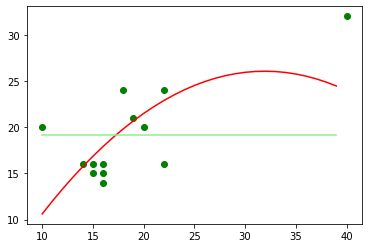

MS Error: 24.437869822485197
MS Regre: 19.430591308321816
Score: 0.2048983217660077


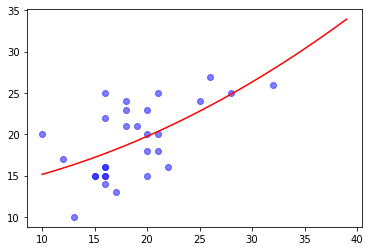

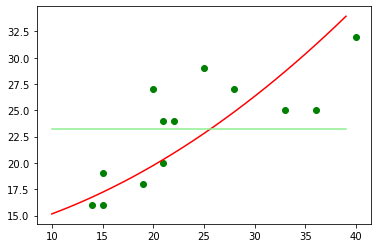

MS Error: 23.56213017751479
MS Regre: 14.299763568616537
Score: 0.3931039570325979


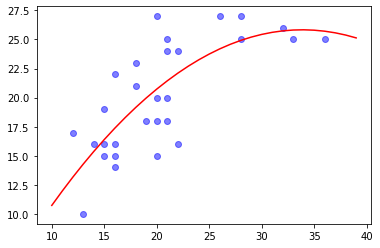

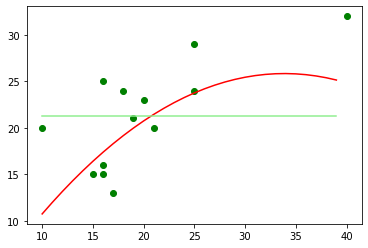

MS Error: 29.597633136094675
MS Regre: 22.473831392908476
Score: 0.24068822363024142


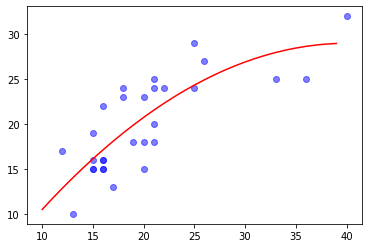

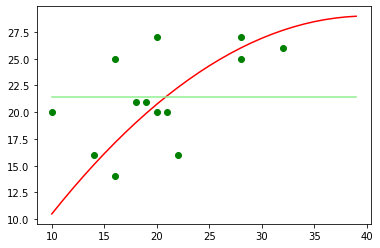

MS Error: 17.62130177514793
MS Regre: 19.579755477296246
Score: -0.11114126113601921


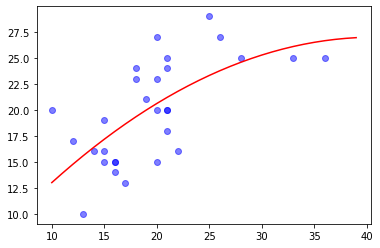

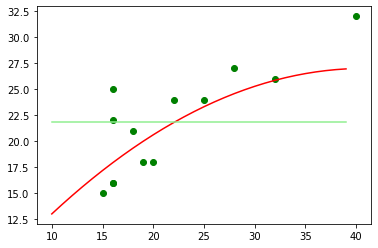

MS Error: 23.97633136094674
MS Regre: 9.917136230998896
Score: 0.5863780792105593


In [36]:
def polycv(degree, X, y, train_index, test_index):
    
    # create a subset of the data using the training cases in cross validation
    tX = X[train_index, : ]
    ty = y[train_index]
    
    # create a subset for the test cases
    testX = X[test_index, :]
    testy = y[test_index]
    
    poly = preprocessing.PolynomialFeatures(degree)
    polytX = poly.fit_transform(tX)
    
    # initialize and fite a new linear regression model
    clin = linear_model.LinearRegression()
    
    # fit only on the training cases
    clin.fit(polytX, ty)
    
    # plot the training data in blue and the prediction line in red
    plt.scatter(tX,ty, c = 'blue', alpha = 0.5)
    plt.plot(x_predict, clin.predict(poly.fit_transform(x_predict)), c = 'red')
    plt.show()
    
    # plot the prediction line in red against the test cases in green
    plt.scatter(testX, testy, c = 'green')
    plt.plot(x_predict, clin.predict(poly.fit_transform(x_predict)), c = 'red')
    
    # plot the mean of the test cases to show what having no model looks like
    plt.plot(x_predict, np.repeat(np.mean(testy), len(x_predict)), c = 'lightgreen')
    
    plt.show()
    
    # the MS of having no model = variance of the test data
    mse = np.var(testy)
    print("MS Error: " + str(mse))
    
    # the MS regression
    msr = sum((testy - clin.predict(poly.fit_transform(testX)))**2)/len(testy)
    print("MS Regre: " + str(msr))
    
    # the score is the proportion of reduction by having regression
    red = (mse - msr)/mse
    print("Score: " + str(red))

for train_index, test_index in cv.split(X):
    polycv(2, X, y, train_index, test_index)

# cubic fit

In [37]:
poly3 = preprocessing.PolynomialFeatures(3)

In [38]:
poly3X = poly3.fit_transform(X)
poly3reg = linear_model.LinearRegression(fit_intercept = False)
poly3reg.fit(poly3X, y)
print(poly3reg.score(poly3X,y))

0.5144827861903245


The R^2 value of the cubic fit is better, but we will see with cross validation that it is not a better model. It is overfitting our data.

In [39]:
poly3_X_new = poly3.fit_transform(x_predict)
poly3_y_hat = poly3reg.predict(poly3_X_new)

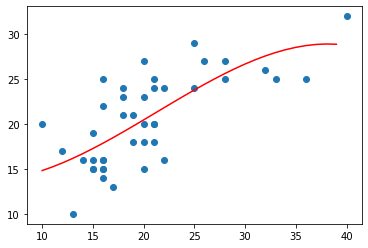

In [40]:
plt.scatter(X,y)
plt.plot(x_predict, poly3_y_hat, c = 'red')

In [41]:
cv_cube = model_selection.cross_val_score(poly3reg, poly3X, y, cv=cv)
print(cv_cube)
print(np.mean(cv_cube))

[-0.01197637 -0.80626221  0.08937258 -0.2144141  -0.62784165]
-0.31422435172852764


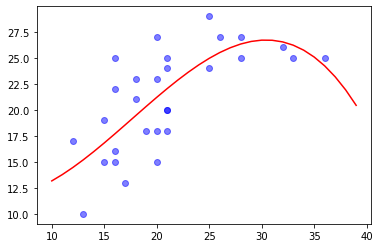

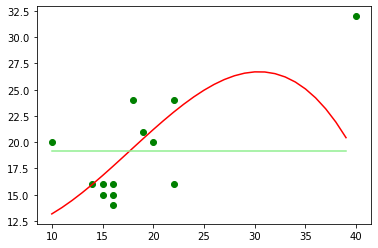

MS Error: 24.437869822485197
MS Regre: 24.73054690130827
Score: -0.01197637441188842


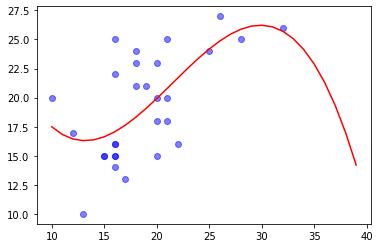

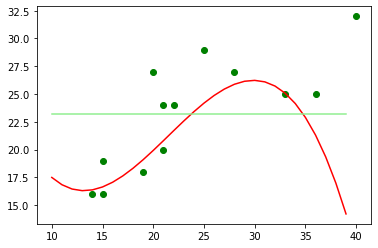

MS Error: 23.56213017751479
MS Regre: 42.5593854028285
Score: -0.806262213229035


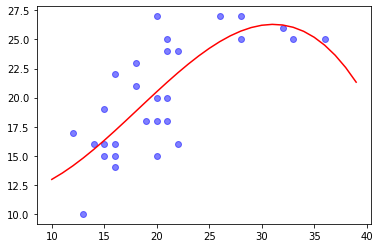

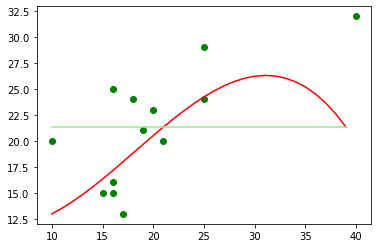

MS Error: 29.597633136094675
MS Regre: 26.952416244091573
Score: 0.08937258191693807


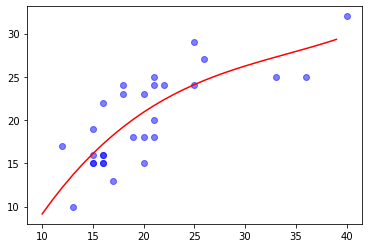

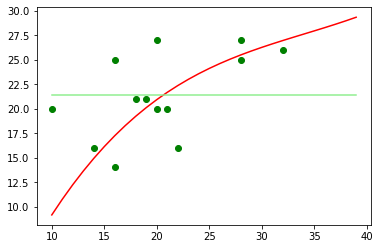

MS Error: 17.62130177514793
MS Regre: 21.399557329605315
Score: -0.21441409963173202


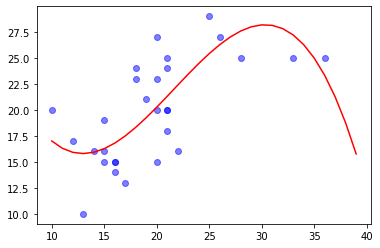

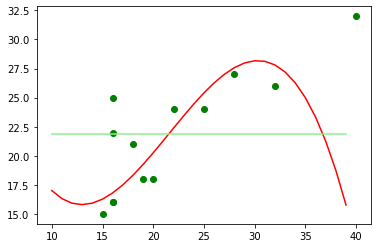

MS Error: 23.97633136094674
MS Regre: 39.02967088257313
Score: -0.6278416532958687


In [42]:
for train_index, test_index in cv.split(X):
    polycv(3, X, y, train_index, test_index)

## higher order polynomials overfit the data: degree 4

In [43]:
# degree4
poly4 = preprocessing.PolynomialFeatures(4)
poly4X = poly4.fit_transform(X)
poly4reg = linear_model.LinearRegression(fit_intercept = False)

cv_4th = model_selection.cross_val_score(poly4reg, poly4X, y, cv=cv)
print(cv_4th)
print(np.mean(cv_4th))

[ 0.2018071  -0.72641196  0.18828366  0.1709722   0.56842689]
0.08061558008437046


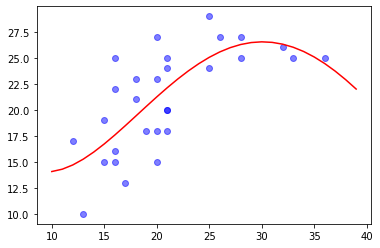

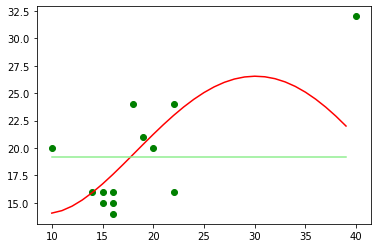

MS Error: 24.437869822485197
MS Regre: 19.50613412129259
Score: 0.20180710254274845


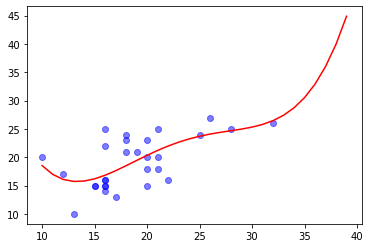

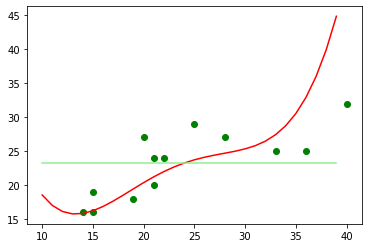

MS Error: 23.56213017751479
MS Regre: 40.67794338026106
Score: -0.7264119616434256


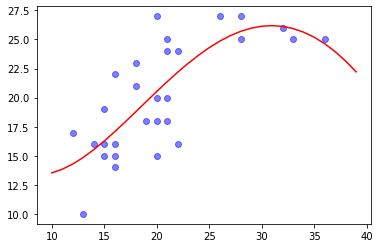

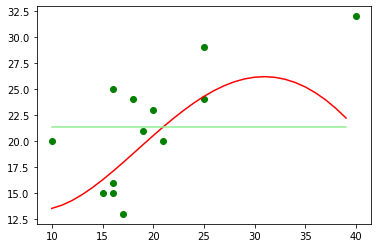

MS Error: 29.597633136094675
MS Regre: 24.02488232515686
Score: 0.18828366394412052


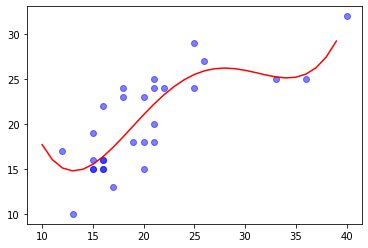

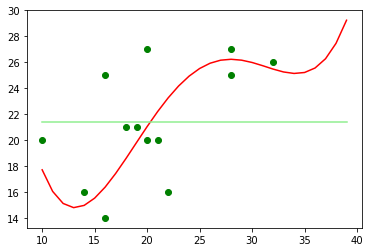

MS Error: 17.62130177514793
MS Regre: 14.608548975086617
Score: 0.17097220389871123


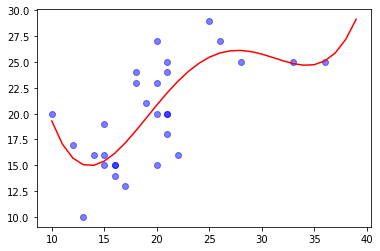

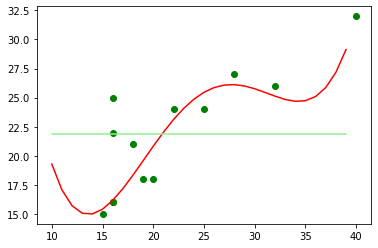

MS Error: 23.97633136094674
MS Regre: 10.347539838494747
Score: 0.5684268922246761


In [44]:
for train_index, test_index in cv.split(X):
    polycv(4, X, y, train_index, test_index)

## degree 5

In [45]:
# degree 5
poly5 = preprocessing.PolynomialFeatures(5)
poly5X = poly5.fit_transform(X)
poly5reg = linear_model.LinearRegression(fit_intercept = False)

cv_5th = model_selection.cross_val_score(poly5reg, poly5X, y, cv=cv)
print(cv_5th)
print(np.mean(cv_5th))

[ 2.44225889e-01 -3.93867615e+02  3.17528922e-01  1.31898318e-02
  1.82845521e-01]
-78.62196493020262


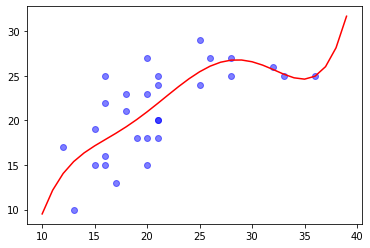

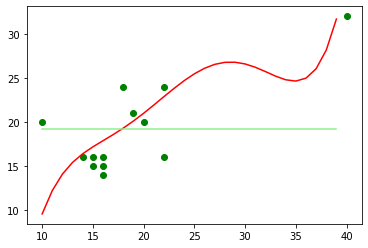

MS Error: 24.437869822485197
MS Regre: 18.469510340494445
Score: 0.24422584805240619


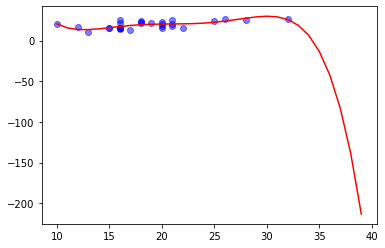

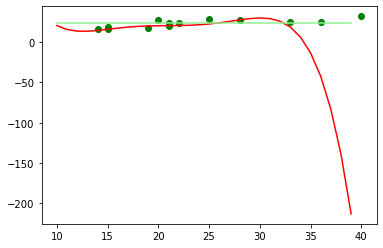

MS Error: 23.56213017751479
MS Regre: 9303.92234272947
Score: -393.8676232851031


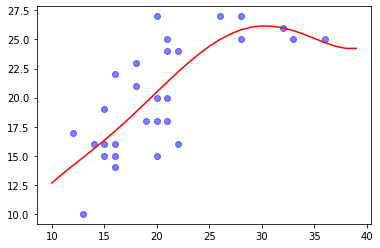

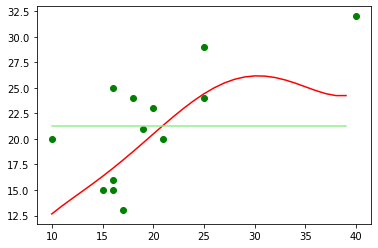

MS Error: 29.597633136094675
MS Regre: 20.19952832768331
Score: 0.31752893095192336


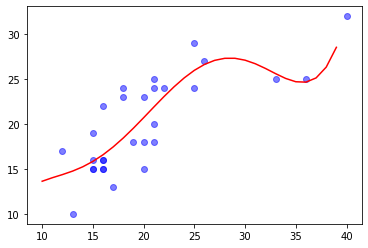

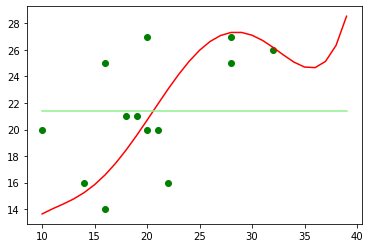

MS Error: 17.62130177514793
MS Regre: 17.388879368387627
Score: 0.013189854513932594


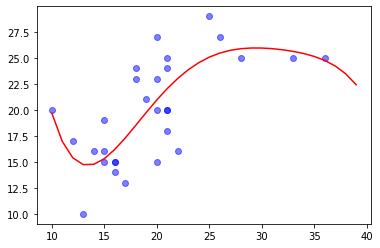

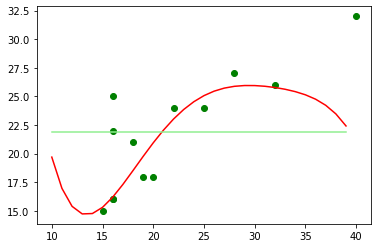

MS Error: 23.97633136094674
MS Regre: 19.59236552693118
Score: 0.18284556415316638


In [46]:
for train_index, test_index in cv.split(X):
    polycv(5, X, y, train_index, test_index)

## Assessing models without all the graphs:



In [ ]:
linear = linear_model.LinearRegression()
linear.fit(X, y)

In [ ]:
# shuffle split says 'shuffle the data' and split it into 5 equal parts
cv = model_selection.ShuffleSplit(n_splits = 5, test_size = 0.3, random_state=0)
cv_linear = model_selection.cross_val_score(linear, X, y, cv = cv)
print(cv_linear)
print(np.mean(cv_linear))

In [ ]:
quad = preprocessing.PolynomialFeatures(2)
quadX = quad.fit_transform(X)
quad_model = linear_model.LinearRegression()
quad_model.fit(quadX, y)

In [ ]:
cv_quad = model_selection.cross_val_score(quad_model, quadX, y, cv = cv)
print(cv_quad)
print(np.mean(cv_quad))

In [ ]:
cube = preprocessing.PolynomialFeatures(3)
cubeX = cube.fit_transform(X)
cube_model = linear_model.LinearRegression()
cube_model.fit(cubeX, y)

In [ ]:
cv_cube = model_selection.cross_val_score(cube_model, cubeX, y, cv = cv)
print(cv_cube)
print(np.mean(cv_cube))

## Y ~ logX model

In [ ]:
log_transform = preprocessing.FunctionTransformer(np.log)
logX = log_transform.fit_transform(X)
logX_model = linear_model.LinearRegression()
logX_model.fit(logX, y)

In [ ]:
cv_logX = model_selection.cross_val_score(logX_model, logX, y, cv = cv)
print(cv_logX)
print(np.mean(cv_logX))